In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import warnings

In [20]:
warnings.filterwarnings("ignore")

# 1. Download the dataset: [Dataset](https://)

#2. Load Dataset

In [5]:
data=pd.read_csv(r'Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#3. Perform Below Visualizations.

## univariate analysis

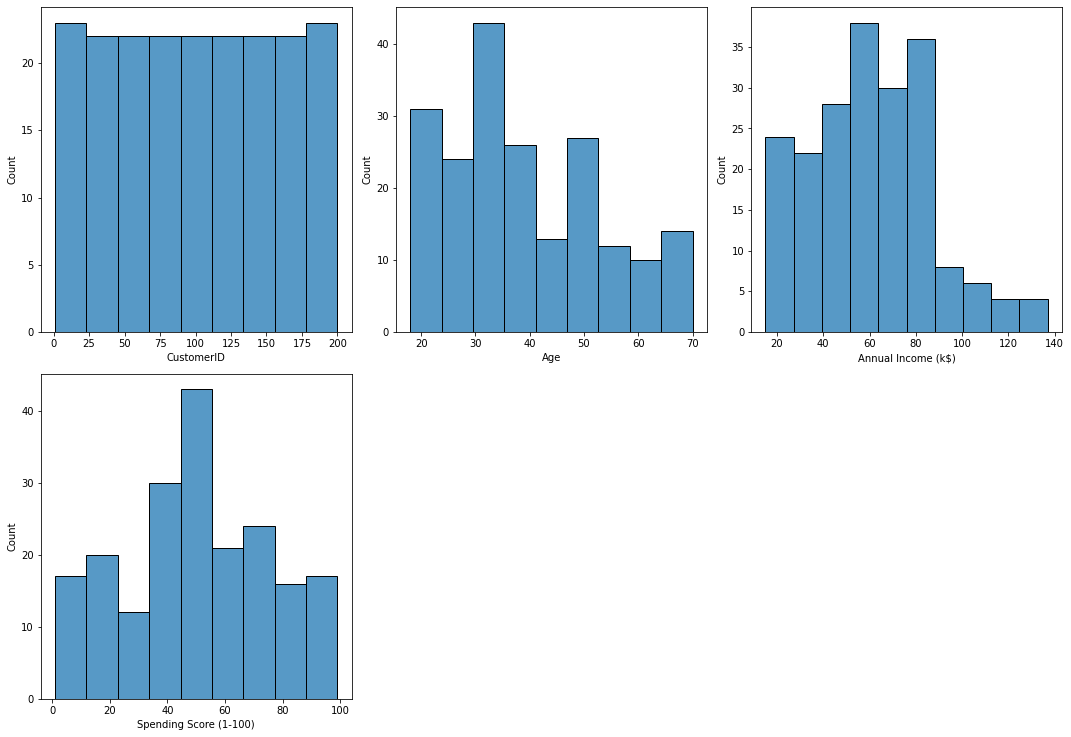

In [7]:
cols = 3
rows = 3
num_cols = data.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    ax=fig.add_subplot(rows,cols,i+1)
    sns.histplot(x = data[col], ax = ax)
fig.tight_layout()
plt.show()

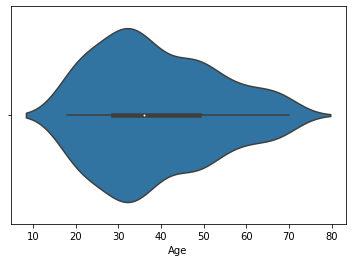

In [8]:
sns.violinplot(x=data["Age"])

## Bivariate analysis

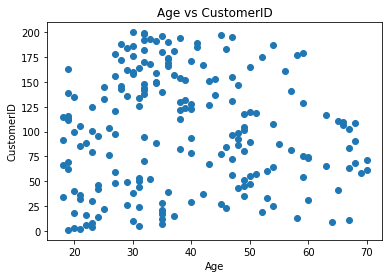

In [11]:
import matplotlib.pyplot as plt
#create scatterplot of hours vs. score
plt.scatter(data.Age, data.CustomerID)
plt.title('Age vs CustomerID')
plt.xlabel('Age')
plt.ylabel('CustomerID')
plt.plot();

## Multivariate analysis

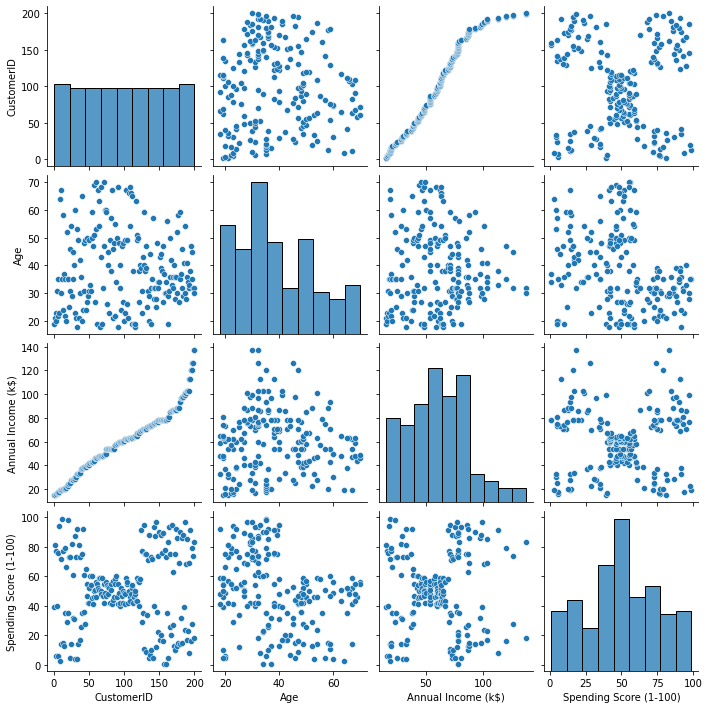

In [12]:
sns.pairplot(data);

#4. Perform descriptive statistics on the dataset.

In [22]:
data.mean()

CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

In [23]:
data.median()

CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

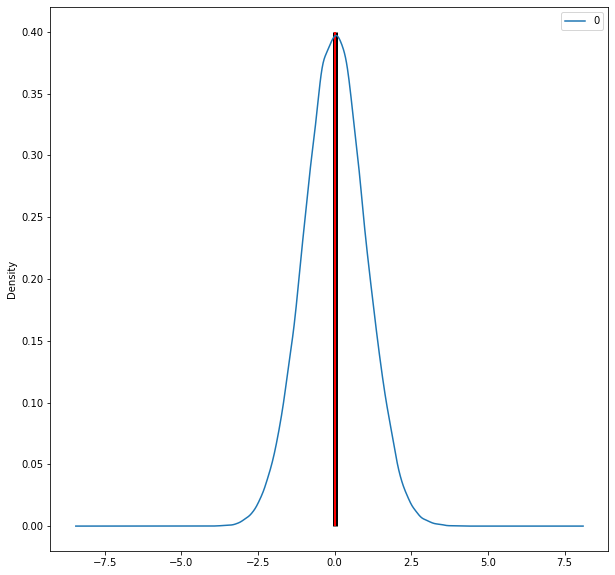

In [27]:
norm_data = pd.DataFrame(np.random.normal(size=100000))
norm_data.plot(kind="density",
              figsize=(10,10));

plt.vlines(norm_data.mean(), # Plot black line at mean
           ymin=0,
           ymax=0.4,
           linewidth=5.0);

plt.vlines(norm_data.median(), # Plot red line at median
           ymin=0,
           ymax=0.4,
           linewidth=2.0,
           color="red");

#5. Check for Missing values and deal with them.

In [31]:
df = pd.DataFrame(data)
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#6. Find the outliers and replace them outliers

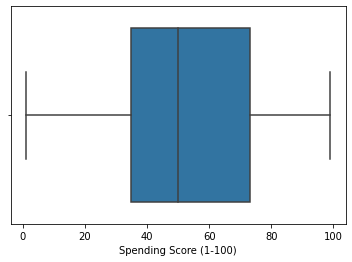

In [32]:
sns.boxplot(df['Spending Score (1-100)'])

In [33]:
Q1 = df['Spending Score (1-100)'].quantile(0.25)
Q3 = df['Spending Score (1-100)'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
df['Spending Score (1-100)']=np.where(df['Spending Score (1-100)']>upper_whisker,upper_whisker,np.where(df['Spending Score (1-100)']<lower_whisker,lower_whisker,df['Spending Score (1-100)']))

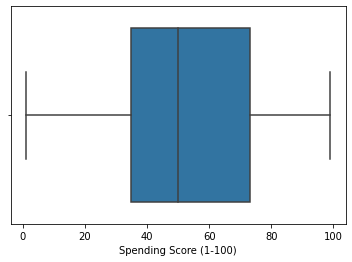

In [34]:
sns.boxplot(df['Spending Score (1-100)'])

#7. Check for Categorical columns and perform encoding.

In [36]:
from sklearn.compose import make_column_selector as selector
categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(data)
categorical_columns

['Gender']

In [37]:
data_categorical = data[categorical_columns]
data_categorical.head()

,Gender
0,Male
1,Male
2,Female
3,Female
4,Female


In [38]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
df['Gender']= label_encoder.fit_transform(df['Gender'])
df['Gender'].unique()

array([1, 0])

In [45]:
# import packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [43]:
df.shape

(200, 5)

In [44]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39.0
1,2,1,21,15,81.0
2,3,0,20,16,6.0
3,4,0,23,16,77.0
4,5,0,31,17,40.0


In [46]:
X= df['Annual Income (k$)']
y=df['Spending Score (1-100)']
# using the train test split function
X_train, X_test, y_train, y_test = train_test_split(
X,y , random_state=104,test_size=0.25, shuffle=True)

In [48]:
X_train.shape , y_train.shape

((150,), (150,))

In [49]:
X_test.shape , y_test.shape

((50,), (50,))

#8. Scaling the data

In [ ]:
df_scaled = df.copy()
col_names = ['Annual Income (k$)', 'Spending Score (1-100)']
features = df_scaled[col_names]

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled[col_names] = scaler.fit_transform(features.values)

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(5, 10))
df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,5.000000,6.938776
1,2,1,21,5.000000,9.081633
2,3,0,20,5.040984,5.255102
3,4,0,23,5.040984,8.877551
4,5,0,31,5.081967,6.989796
...,...,...,...,...,...
195,196,0,35,9.303279,8.979592
196,197,0,45,9.549180,6.377551
197,198,1,32,9.549180,8.724490
198,199,1,32,10.000000,5.867347


#9. Perform any of the clustering algorithms

In [55]:
# k-means clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot


#10. Add the cluster data with the primary dataset

In [57]:
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2,
n_redundant=0, n_clusters_per_class=1, random_state=4)

#11. Split the data into dependent and independent variables.

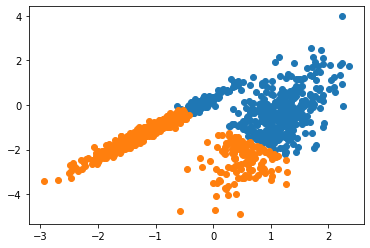

In [61]:
# define the model
model = KMeans(n_clusters=2)
# fit the model
model.fit(X)
# assign a cluster to each example 
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot 
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster) # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

#12. Split the data into training and testing

In [62]:
#testing and training
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.05, random_state=0)

In [63]:
(X_train.shape , y_train.shape) , (X_test.shape , y_test.shape)

(((190, 4), (190,)), ((10, 4), (10,)))

#13. Build the Model

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier()

#14. Train the Model

In [78]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

#15. Test the Model

In [79]:
# Check model performance on training data
predictions = model.predict(X_train)
print(accuracy_score(y_train, predictions))

1.0


#16. Measure the performance using Evaluation

##Metrics. 

In [81]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss

In [88]:
X_actual = [0, 1, 0, 1, 0, 0, 1, 0, 0, 0]
Y_predic = [1, 0, 1, 1, 1, 0, 1, 1, 0, 0]
results = confusion_matrix(X_actual, Y_predic)
print(results)

[[3 4]
 [1 2]]


In [93]:
print ('Accuracy Score is',accuracy_score(X_actual, Y_predic))

Accuracy Score is 0.5


In [94]:
print ('Classification Report : ')
print (classification_report(X_actual, Y_predic))

Classification Report : 
              precision    recall  f1-score   support

           0       0.75      0.43      0.55         7
           1       0.33      0.67      0.44         3

    accuracy                           0.50        10
   macro avg       0.54      0.55      0.49        10
weighted avg       0.62      0.50      0.52        10



In [95]:
print('AUC-ROC:',roc_auc_score(X_actual, Y_predic))

AUC-ROC: 0.5476190476190477


In [96]:
print('LOGLOSS Value is',log_loss(X_actual, Y_predic))

LOGLOSS Value is 17.26970803642742
